# Heart disease prediction from Kaggle

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [176]:
df['target'].unique()

array([1, 0])

In [177]:
df['oldpeak'] = df['oldpeak'].astype('float32')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float32
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float32(1), int64(13)
memory usage: 32.1 KB


In [179]:
Y = df['target']
df.drop('target', axis=1, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [180]:
from tensorflow.keras.layers import Dense, Dropout

model = tf.keras.Sequential([
    Dense(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam', loss='mse', metrics=['accuracy'])

In [181]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#early_stopper = EarlyStopping(monitor = 'accuracy', mode = 'auto', patience = 20, min_delta= 0.001)
checkpoint = ModelCheckpoint('checkpoints', monitor='val_loss', save_best_only = True, save_weights_only = True)

In [182]:
history = model.fit(df, Y, validation_split = 0.2, epochs=1000, batch_size=256, callbacks = [checkpoint], verbose=1)

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1/1 [==============================] - 0s 97ms/step - loss: 0.4441 - accuracy: 0.3430 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4170 - accuracy: 0.3306 - val_loss: 0.0994 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.3653 - accuracy: 0.3388 - val_loss: 0.1380 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3401 - acc

1/1 [==============================] - 0s 18ms/step - loss: 0.1912 - accuracy: 0.7149 - val_loss: 0.4522 - val_accuracy: 0.1967
Epoch 54/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1931 - accuracy: 0.7149 - val_loss: 0.4450 - val_accuracy: 0.1967
Epoch 55/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1854 - accuracy: 0.6694 - val_loss: 0.4367 - val_accuracy: 0.1967
Epoch 56/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1947 - accuracy: 0.7190 - val_loss: 0.4285 - val_accuracy: 0.2295
Epoch 57/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1894 - accuracy: 0.7273 - val_loss: 0.4216 - val_accuracy: 0.2295
Epoch 58/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1761 - accuracy: 0.7521 - val_loss: 0.4152 - val_accuracy: 0.2459
Epoch 59/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1815 - accuracy: 0.7438 - val_loss: 0.4099 - val_accuracy: 0.2623
Epoch 60/1000
1/1 [=

Epoch 111/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1761 - accuracy: 0.7231 - val_loss: 0.4098 - val_accuracy: 0.3115
Epoch 112/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1729 - accuracy: 0.7686 - val_loss: 0.4108 - val_accuracy: 0.3115
Epoch 113/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1803 - accuracy: 0.7273 - val_loss: 0.4099 - val_accuracy: 0.3115
Epoch 114/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1711 - accuracy: 0.7562 - val_loss: 0.4070 - val_accuracy: 0.3115
Epoch 115/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1725 - accuracy: 0.7603 - val_loss: 0.4017 - val_accuracy: 0.3115
Epoch 116/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1665 - accuracy: 0.7479 - val_loss: 0.3935 - val_accuracy: 0.3443
Epoch 117/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1796 - accuracy: 0.7314 - val_loss: 0.3898 - val_accuracy: 0.3443

1/1 [==============================] - 0s 20ms/step - loss: 0.1587 - accuracy: 0.7686 - val_loss: 0.3960 - val_accuracy: 0.3115
Epoch 169/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1662 - accuracy: 0.7603 - val_loss: 0.3958 - val_accuracy: 0.3115
Epoch 170/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1707 - accuracy: 0.7603 - val_loss: 0.3966 - val_accuracy: 0.3115
Epoch 171/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1735 - accuracy: 0.7273 - val_loss: 0.3983 - val_accuracy: 0.3115
Epoch 172/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1589 - accuracy: 0.8099 - val_loss: 0.4021 - val_accuracy: 0.3115
Epoch 173/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1587 - accuracy: 0.7562 - val_loss: 0.4054 - val_accuracy: 0.3115
Epoch 174/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1627 - accuracy: 0.7479 - val_loss: 0.4083 - val_accuracy: 0.2951
Epoch 175/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.1502 - accuracy: 0.7934 - val_loss: 0.3616 - val_accuracy: 0.4098
Epoch 226/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1601 - accuracy: 0.7769 - val_loss: 0.3543 - val_accuracy: 0.4098
Epoch 227/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1555 - accuracy: 0.7893 - val_loss: 0.3530 - val_accuracy: 0.4098
Epoch 228/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1619 - accuracy: 0.7479 - val_loss: 0.3604 - val_accuracy: 0.3934
Epoch 229/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1577 - accuracy: 0.7645 - val_loss: 0.3704 - val_accuracy: 0.3934
Epoch 230/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1592 - accuracy: 0.7645 - val_loss: 0.3784 - val_accuracy: 0.3934
Epoch 231/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1549 - accuracy: 0.7479 - val_loss: 0.3809 - val_accuracy: 0.3770
Epoch 232/1000

1/1 [==============================] - 0s 22ms/step - loss: 0.1503 - accuracy: 0.7934 - val_loss: 0.3668 - val_accuracy: 0.3934
Epoch 283/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1518 - accuracy: 0.7727 - val_loss: 0.3656 - val_accuracy: 0.3934
Epoch 284/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1530 - accuracy: 0.7975 - val_loss: 0.3644 - val_accuracy: 0.3934
Epoch 285/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1478 - accuracy: 0.8182 - val_loss: 0.3672 - val_accuracy: 0.4098
Epoch 286/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1554 - accuracy: 0.7727 - val_loss: 0.3701 - val_accuracy: 0.4098
Epoch 287/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1514 - accuracy: 0.7934 - val_loss: 0.3770 - val_accuracy: 0.3934
Epoch 288/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1463 - accuracy: 0.7975 - val_loss: 0.3841 - val_accuracy: 0.3770
Epoch 289/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.1465 - accuracy: 0.8058 - val_loss: 0.3858 - val_accuracy: 0.3934
Epoch 340/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1408 - accuracy: 0.7934 - val_loss: 0.3842 - val_accuracy: 0.3770
Epoch 341/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.1507 - accuracy: 0.8017 - val_loss: 0.3811 - val_accuracy: 0.3770
Epoch 342/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1541 - accuracy: 0.7893 - val_loss: 0.3730 - val_accuracy: 0.3934
Epoch 343/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1467 - accuracy: 0.7975 - val_loss: 0.3671 - val_accuracy: 0.4098
Epoch 344/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.1425 - accuracy: 0.8140 - val_loss: 0.3644 - val_accuracy: 0.4098
Epoch 345/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1503 - accuracy: 0.7893 - val_loss: 0.3613 - val_accuracy: 0.4262
Epoch 346/1000

1/1 [==============================] - 0s 32ms/step - loss: 0.1379 - accuracy: 0.8017 - val_loss: 0.3879 - val_accuracy: 0.3934
Epoch 397/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.1402 - accuracy: 0.7975 - val_loss: 0.3850 - val_accuracy: 0.4098
Epoch 398/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1318 - accuracy: 0.8264 - val_loss: 0.3830 - val_accuracy: 0.4098
Epoch 399/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1344 - accuracy: 0.8306 - val_loss: 0.3763 - val_accuracy: 0.4098
Epoch 400/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1398 - accuracy: 0.8058 - val_loss: 0.3659 - val_accuracy: 0.4262
Epoch 401/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1363 - accuracy: 0.8182 - val_loss: 0.3613 - val_accuracy: 0.4262
Epoch 402/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1426 - accuracy: 0.7893 - val_loss: 0.3594 - val_accuracy: 0.4262
Epoch 403/1000

1/1 [==============================] - 0s 26ms/step - loss: 0.1238 - accuracy: 0.8264 - val_loss: 0.3440 - val_accuracy: 0.4754
Epoch 454/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1263 - accuracy: 0.8223 - val_loss: 0.3394 - val_accuracy: 0.4754
Epoch 455/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1263 - accuracy: 0.8347 - val_loss: 0.3379 - val_accuracy: 0.4754
Epoch 456/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1250 - accuracy: 0.8223 - val_loss: 0.3366 - val_accuracy: 0.4754
Epoch 457/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1371 - accuracy: 0.8099 - val_loss: 0.3397 - val_accuracy: 0.4754
Epoch 458/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1188 - accuracy: 0.8554 - val_loss: 0.3504 - val_accuracy: 0.4426
Epoch 459/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1330 - accuracy: 0.8182 - val_loss: 0.3677 - val_accuracy: 0.4262
Epoch 460/1000

1/1 [==============================] - 0s 23ms/step - loss: 0.1186 - accuracy: 0.8347 - val_loss: 0.3663 - val_accuracy: 0.4262
Epoch 511/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1354 - accuracy: 0.8140 - val_loss: 0.3674 - val_accuracy: 0.4426
Epoch 512/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1219 - accuracy: 0.8306 - val_loss: 0.3695 - val_accuracy: 0.4098
Epoch 513/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1322 - accuracy: 0.8140 - val_loss: 0.3671 - val_accuracy: 0.4262
Epoch 514/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1210 - accuracy: 0.8388 - val_loss: 0.3596 - val_accuracy: 0.4262
Epoch 515/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1169 - accuracy: 0.8388 - val_loss: 0.3470 - val_accuracy: 0.4590
Epoch 516/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1331 - accuracy: 0.8058 - val_loss: 0.3360 - val_accuracy: 0.4754
Epoch 517/1000

1/1 [==============================] - 0s 25ms/step - loss: 0.1174 - accuracy: 0.8512 - val_loss: 0.3570 - val_accuracy: 0.4590
Epoch 568/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1140 - accuracy: 0.8554 - val_loss: 0.3651 - val_accuracy: 0.4426
Epoch 569/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1196 - accuracy: 0.8512 - val_loss: 0.3705 - val_accuracy: 0.4262
Epoch 570/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1239 - accuracy: 0.8264 - val_loss: 0.3753 - val_accuracy: 0.4590
Epoch 571/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1160 - accuracy: 0.8264 - val_loss: 0.3775 - val_accuracy: 0.4262
Epoch 572/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1348 - accuracy: 0.8182 - val_loss: 0.3786 - val_accuracy: 0.4262
Epoch 573/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1206 - accuracy: 0.8430 - val_loss: 0.3731 - val_accuracy: 0.4262
Epoch 574/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1154 - accuracy: 0.8347 - val_loss: 0.3711 - val_accuracy: 0.4262
Epoch 625/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1120 - accuracy: 0.8471 - val_loss: 0.3647 - val_accuracy: 0.4426
Epoch 626/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1103 - accuracy: 0.8554 - val_loss: 0.3557 - val_accuracy: 0.4426
Epoch 627/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1093 - accuracy: 0.8595 - val_loss: 0.3530 - val_accuracy: 0.4590
Epoch 628/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1194 - accuracy: 0.8430 - val_loss: 0.3575 - val_accuracy: 0.4426
Epoch 629/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.1126 - accuracy: 0.8306 - val_loss: 0.3567 - val_accuracy: 0.4426
Epoch 630/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1101 - accuracy: 0.8636 - val_loss: 0.3606 - val_accuracy: 0.4426
Epoch 631/1000

1/1 [==============================] - 0s 15ms/step - loss: 0.1068 - accuracy: 0.8636 - val_loss: 0.3467 - val_accuracy: 0.4918
Epoch 682/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1045 - accuracy: 0.8760 - val_loss: 0.3370 - val_accuracy: 0.4918
Epoch 683/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1173 - accuracy: 0.8554 - val_loss: 0.3329 - val_accuracy: 0.5082
Epoch 684/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0967 - accuracy: 0.8678 - val_loss: 0.3367 - val_accuracy: 0.5082
Epoch 685/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1199 - accuracy: 0.8512 - val_loss: 0.3518 - val_accuracy: 0.4754
Epoch 686/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1116 - accuracy: 0.8678 - val_loss: 0.3688 - val_accuracy: 0.4262
Epoch 687/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1038 - accuracy: 0.8471 - val_loss: 0.3809 - val_accuracy: 0.4262
Epoch 688/1000

1/1 [==============================] - 0s 32ms/step - loss: 0.1089 - accuracy: 0.8678 - val_loss: 0.3578 - val_accuracy: 0.4754
Epoch 739/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1034 - accuracy: 0.8554 - val_loss: 0.3646 - val_accuracy: 0.4590
Epoch 740/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1047 - accuracy: 0.8802 - val_loss: 0.3696 - val_accuracy: 0.4426
Epoch 741/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1077 - accuracy: 0.8554 - val_loss: 0.3716 - val_accuracy: 0.4098
Epoch 742/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1031 - accuracy: 0.8678 - val_loss: 0.3670 - val_accuracy: 0.3934
Epoch 743/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1048 - accuracy: 0.8719 - val_loss: 0.3610 - val_accuracy: 0.4262
Epoch 744/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1148 - accuracy: 0.8471 - val_loss: 0.3535 - val_accuracy: 0.4754
Epoch 745/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.1134 - accuracy: 0.8512 - val_loss: 0.3372 - val_accuracy: 0.5246
Epoch 796/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1012 - accuracy: 0.8595 - val_loss: 0.3297 - val_accuracy: 0.5410
Epoch 797/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1118 - accuracy: 0.8471 - val_loss: 0.3333 - val_accuracy: 0.5246
Epoch 798/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0968 - accuracy: 0.8802 - val_loss: 0.3468 - val_accuracy: 0.4918
Epoch 799/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1039 - accuracy: 0.8636 - val_loss: 0.3620 - val_accuracy: 0.4918
Epoch 800/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1149 - accuracy: 0.8430 - val_loss: 0.3689 - val_accuracy: 0.4754
Epoch 801/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0983 - accuracy: 0.8678 - val_loss: 0.3711 - val_accuracy: 0.4754
Epoch 802/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.1117 - accuracy: 0.8512 - val_loss: 0.3407 - val_accuracy: 0.5246
Epoch 853/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1032 - accuracy: 0.8678 - val_loss: 0.3243 - val_accuracy: 0.5574
Epoch 854/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0973 - accuracy: 0.8802 - val_loss: 0.3133 - val_accuracy: 0.5574
Epoch 855/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0909 - accuracy: 0.8926 - val_loss: 0.3138 - val_accuracy: 0.5574
Epoch 856/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0938 - accuracy: 0.9008 - val_loss: 0.3222 - val_accuracy: 0.5574
Epoch 857/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1047 - accuracy: 0.8678 - val_loss: 0.3318 - val_accuracy: 0.5574
Epoch 858/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0973 - accuracy: 0.8760 - val_loss: 0.3387 - val_accuracy: 0.5246
Epoch 859/1000

1/1 [==============================] - 0s 13ms/step - loss: 0.0977 - accuracy: 0.8884 - val_loss: 0.3326 - val_accuracy: 0.5574
Epoch 910/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0976 - accuracy: 0.8636 - val_loss: 0.3354 - val_accuracy: 0.5574
Epoch 911/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0973 - accuracy: 0.8760 - val_loss: 0.3384 - val_accuracy: 0.5574
Epoch 912/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1072 - accuracy: 0.8678 - val_loss: 0.3461 - val_accuracy: 0.5574
Epoch 913/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0851 - accuracy: 0.8802 - val_loss: 0.3519 - val_accuracy: 0.5410
Epoch 914/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0980 - accuracy: 0.8843 - val_loss: 0.3550 - val_accuracy: 0.5410
Epoch 915/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0936 - accuracy: 0.8802 - val_loss: 0.3573 - val_accuracy: 0.5410
Epoch 916/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.1002 - accuracy: 0.8554 - val_loss: 0.3354 - val_accuracy: 0.5574
Epoch 967/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1117 - accuracy: 0.8471 - val_loss: 0.3280 - val_accuracy: 0.5574
Epoch 968/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0981 - accuracy: 0.8678 - val_loss: 0.3275 - val_accuracy: 0.5574
Epoch 969/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0925 - accuracy: 0.8802 - val_loss: 0.3323 - val_accuracy: 0.5574
Epoch 970/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0957 - accuracy: 0.8760 - val_loss: 0.3366 - val_accuracy: 0.5574
Epoch 971/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0781 - accuracy: 0.8967 - val_loss: 0.3452 - val_accuracy: 0.5574
Epoch 972/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0908 - accuracy: 0.8636 - val_loss: 0.3487 - val_accuracy: 0.5574
Epoch 973/1000

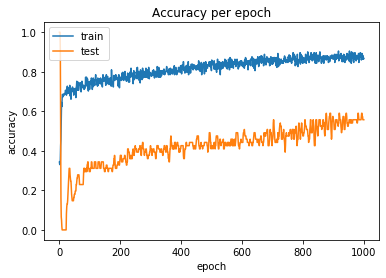

In [183]:
results = pd.DataFrame(history.history)

acc = results['accuracy']
loss = results['loss']
val_acc = results['val_accuracy']
val_loss = results['val_loss']

epochs = range(len(acc))

plt.plot(acc)
plt.plot(val_acc)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy per epoch')
plt.show()

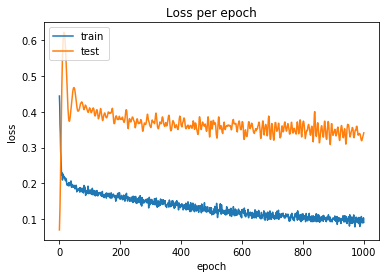

In [184]:
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Loss per epoch')
plt.show()

In [214]:
def truncate(number, decimals):
    step = 10.0 ** decimals
    return math.trunc(step * number) / step

In [218]:
def into_percentage(x):
    x = truncate(x,3)
    return round(x*100,3)

into_percentage(0.99456)

99.4

In [219]:
def predict(x):
    preds = model.predict(x)
    for i in preds:
        if i > 0.5:
            print("Sick with score of :", into_percentage(float(i)), "%")
        else:
            print("Should be fine. Score of  ", into_percentage(float(i)), "%")

In [224]:
predict(df[280:285])

Should be fine. Score of   13.0 %
Sick with score of : 96.2 %
Sick with score of : 87.4 %
Sick with score of : 92.5 %
Sick with score of : 67.7 %
